In [6]:
#Loading the data- the data that I will use in this model is the classical SMS Spam Collection 
#I shall detect whether or not an email should be classified as ham or spam 

#The data has a form: [label] [tab] [message]
import pandas as pd
path='C:\\Users\\sagi\\Desktop\\Learning\\ML\\Datasets\\SMSSpamCollection'
df = pd.read_table(path,
                   sep='\t',
                   header=None,
                   names=['label', 'message'])

In [7]:
#Preprocess the data

#Convert data from strings to binary
df['label'] = df.label.map({'ham': 0, 'spam': 1})

#Convert characters in the message to lower case
df['message'] = df.message.map(lambda x: x.lower())

#Remove any punctuation
df['message'] = df.message.str.replace('[^\w\s]', '')

#Tokenize the messages into into single words
import nltk
nltk.download() #"Models" --> "punkt"
df['message'] = df['message'].apply(nltk.word_tokenize)

#Word stemming (normalize the text for all variations of words carry the same meaning, regardless of the tense)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [8]:
#Transform the data into occurrences (features)
from sklearn.feature_extraction.text import CountVectorizer

# Converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

#Using tf-idf to transform the words (evaluate how important a word is)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(counts)
counts = transformer.transform(counts)

In [29]:
#Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.2)

In [30]:
#Naive Bayes Classifier and fitting the data
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [31]:
#Evaluating
import numpy as np
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9533632286995516


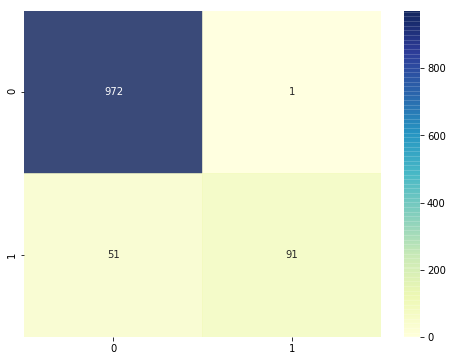

In [32]:
#Confusion matrix
#Making sure that we're not overfitting (since we a big variation in data- 86.6% legitimate in contrast to 13.4% spam)
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#y_pred = model.predict_classes(X, verbose=0)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)